In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
dataset_path = '/kaggle/input/webmd-reviews-for-hypertension-drugs/'

reviews_file = dataset_path + 'hypertension_drug_webmd_reviews.csv'
df = pd.read_csv(reviews_file, index_col=0)

col_descripts_file = dataset_path + 'column_descriptions.csv'
col_descripts = pd.read_csv(col_descripts_file)

In [3]:
# description of columns

from pandas import option_context
from IPython.display import display

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = col_descripts.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,column_name,description
0,drug_name,Name of medication being reviewed
1,date,Date of review
2,age,"Age group of patient, selected from a dropdown list"
3,gender,"Gender of patient, selected from a dropdown list"
4,time_on_drug,"How long the medication has been taken, selected from a dropdown list"
5,reviewer_type,"The type of person reviewing, patient or caregiver"
6,condition,"The ""main reason for taking this medication,"" selected from a dropdown list"
7,rating_overall,"Overall rating for the drug, the average of rating_effectiveness, rating_ease_of_use, and rating_satisfaction, from 1 to 5"
8,rating_effectiveness,"Agreement with the statement ""This drug has worked for me,"" from 1 to 5 stars"
9,rating_ease_of_use,"Agreement with the statement ""This medication has been easy for me to use,"" from 1 to 5 stars"


In [4]:
# total number of reviews available
len(df)

32376

In [5]:
# example of some of the records in the dataset
df.head(5)

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,Triamterene Oral,12/31/2022,65-74,Male,1 to 6 months,Patient,Other,4.7,5,5,4,Taking this medication for Meinere’s. Had thre...
1,Triamterene Oral,5/16/2022,55-64,NaN,1 to 6 months,Patient,Visible Water Retention,2.0,2,2,2,Dr changed me to this medication from the comb...
2,Triamterene Oral,5/15/2020,45-54,Female,1 to 6 months,NaN,High Blood Pressure,1.0,1,1,1,I am 54 years old woman and never had any heal...
3,Triamterene Oral,5/20/2019,45-54,Female,less than 1 month,Patient,High Blood Pressure,5.0,5,5,5,Best medication I’ve ever been given. I was g...
4,Triamterene Oral,2/26/2018,55-64,NaN,less than 1 month,Patient,High Blood Pressure,3.0,3,3,3,I've been taking it for a week. I have experie...


In [6]:
# possible values for reviewer type: patient, caregiver, or empty
for x in pd.unique(df['reviewer_type']):
    print(x)

Patient
nan
Caregiver


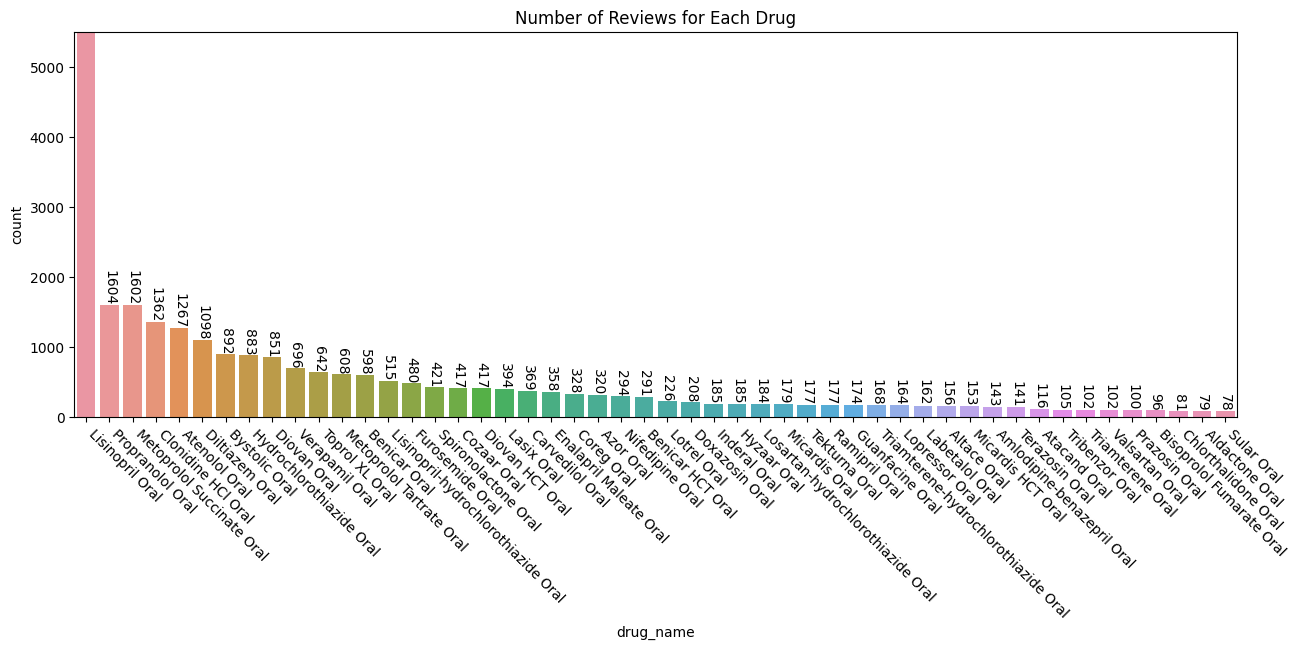

In [7]:
# count number of reviews for each drug - plot only the top n
fig, ax = plt.subplots(figsize=(15, 5))
n_top = 50
order = df['drug_name'].value_counts(ascending=False)[:50]
sns.countplot(df, x='drug_name', order=order.index)
plt.xticks(rotation=-45, ha='left')
ax.bar_label(container=ax.containers[0], labels=order, rotation=-90)
plt.title('Number of Reviews for Each Drug')
plt.ylim(0, 5500);

In [8]:
# number of drugs with at least n reviews
counts = df['drug_name'].value_counts()
print(f'{np.sum(counts >= 100)} drugs with at least 100 reviews')
print(f'{np.sum(counts >= 50)} drugs with at least 50 reviews')

46 drugs with at least 100 reviews
72 drugs with at least 50 reviews


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


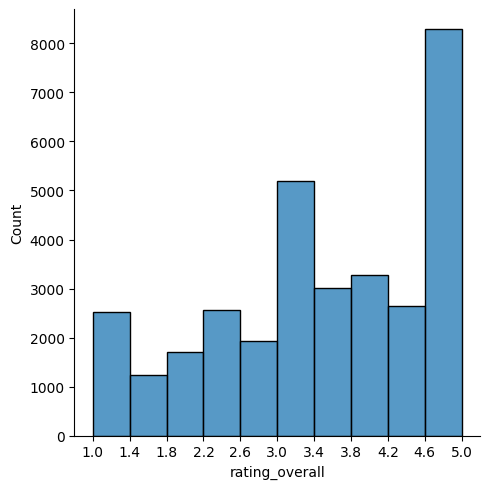

In [9]:
bins = 10
bin_width = (5-1)/bins
ax = sns.displot(df, x='rating_overall', bins=bins)
plt.xticks(np.arange(1, 5+bin_width, bin_width));

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


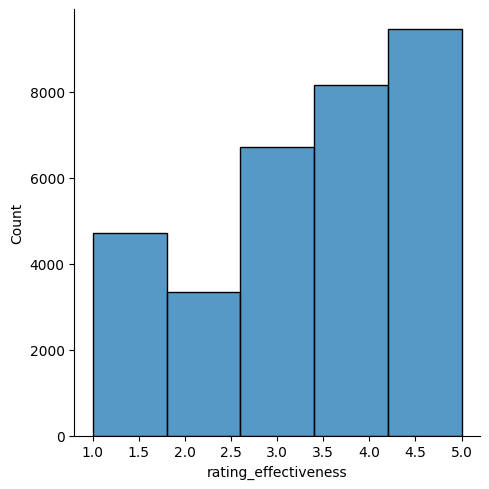

In [10]:
sns.displot(df, x='rating_effectiveness', bins=5);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


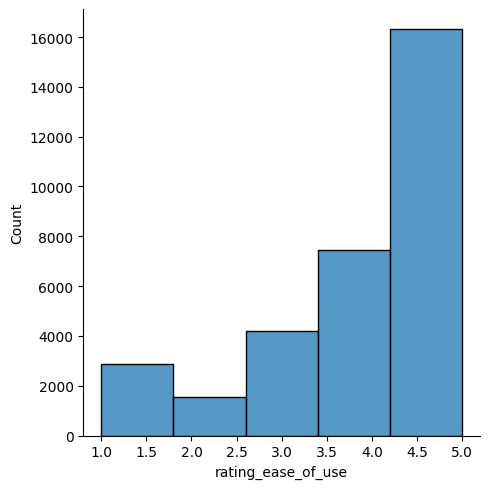

In [11]:
sns.displot(df, x='rating_ease_of_use', bins=5);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


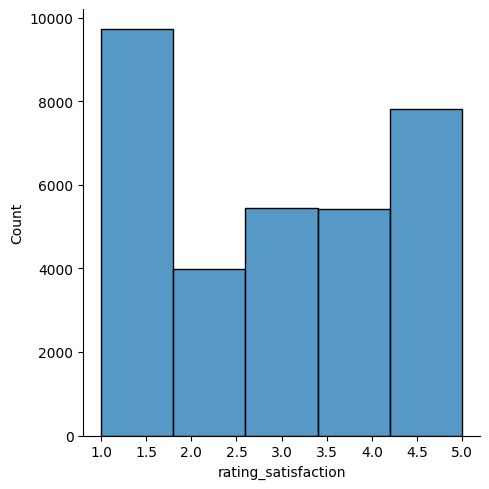

In [12]:
sns.displot(df, x='rating_satisfaction', bins=5)

<Axes: xlabel='age', ylabel='count'>

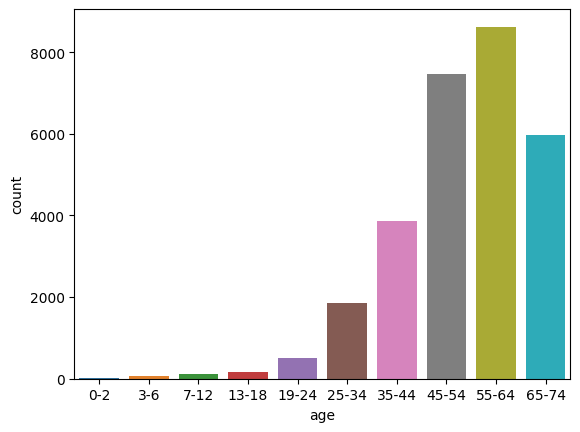

In [13]:
vals = np.array([x for x in pd.unique(df['age']) if type(x)==str])
first_numbers = [int(x.split('-')[0]) for x in vals]
order_inds = np.argsort(first_numbers)
order = vals[order_inds]
sns.countplot(df, x='age', order=order)

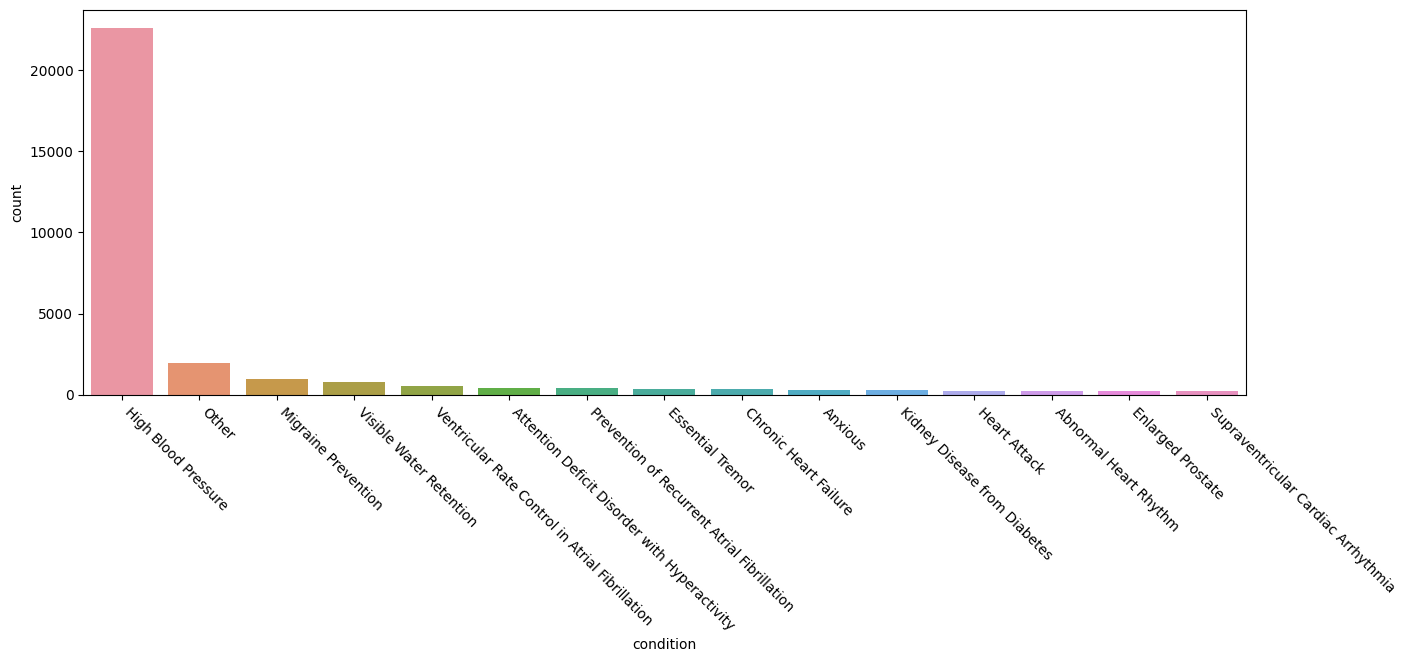

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
order = df['condition'].value_counts(ascending=False)
top_n = 15
top_conds = order[:top_n].index
sns.countplot(df[[x in top_conds for x in df['condition']]], x='condition', order=top_conds)
plt.xticks(rotation=-45, ha='left');

## Suggestions for Data Cleaning

In [15]:
# identify entries with NAs and remove or interpolate values depending on the analysis that you are doing
df.isna().sum()

drug_name                  0
date                       0
age                     3694
gender                  2191
time_on_drug            1601
reviewer_type           1315
condition                112
rating_overall             0
rating_effectiveness       0
rating_ease_of_use         0
rating_satisfaction        0
text                    5087
dtype: int64

In [16]:
# inspect the records where patient is very young
# it is possible that some of these are user input errors
# but there are also entries where age, time on drug, and reviewer type are consistent
df[[x == '0-2' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
3054,Metoprolol Tartrate Oral,6/21/2022,0-2,Male,6 months to less than 1 year,Caregiver,Ventricular Rate Control in Atrial Fibrillation,2.0,1,4,1,"My dad is active, healthy, no previous conditi..."
3058,Metoprolol Tartrate Oral,4/3/2022,0-2,Female,6 months to less than 1 year,Patient,High Blood Pressure,2.0,1,3,2,Weight gain of 30 lbs in last 3 months mostly ...
4408,Clonidine HCl Oral,7/22/2011,0-2,Female,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,2.7,3,3,2,"My daughter is two years old, her doctor precr..."
4516,Clonidine HCl Oral,11/24/2009,0-2,Male,1 to less than 2 years,Caregiver,High Blood Pressure,5.0,5,5,5,my son has H/B he is 2yrs old and also takes ...
4862,Clonidine HCl Oral,7/22/2011,0-2,Female,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,2.7,3,3,2,"My daughter is two years old, her doctor precr..."
4970,Clonidine HCl Oral,11/24/2009,0-2,Male,1 to less than 2 years,Caregiver,High Blood Pressure,5.0,5,5,5,my son has H/B he is 2yrs old and also takes ...
5316,Clonidine HCl Oral,7/22/2011,0-2,Female,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,2.7,3,3,2,"My daughter is two years old, her doctor precr..."
5424,Clonidine HCl Oral,11/24/2009,0-2,Male,1 to less than 2 years,Caregiver,High Blood Pressure,5.0,5,5,5,my son has H/B he is 2yrs old and also takes ...
5969,Microzide Oral,9/4/2015,0-2,Male,less than 1 month,Patient,Accumulation of Fluid Resulting from Chronic H...,4.0,4,4,4,Q/??2754595898??? ??? ???? ???? ???? ???????...
6597,Nebivolol Oral,12/21/2021,0-2,Female,less than 1 month,Patient,High Blood Pressure,2.0,1,4,1,Bystolic works pretty well but the latest refi...


In [17]:
df[[x == '3-6' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
1720,Atenolol Oral,10/16/2022,3-6,Male,1 to 6 months,Patient,Rapid Ventricular Heartbeat,5.0,5,5,5,Please read - I think I can help people. I am ...
4456,Clonidine HCl Oral,9/3/2010,3-6,Male,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,3.7,3,5,3,"My 6 year old is diagnosed with Anxiety, and A..."
4481,Clonidine HCl Oral,4/28/2010,3-6,Female,2 to less than 5 years,Caregiver,Attention Deficit Disorder with Hyperactivity,4.7,5,5,4,satisfied
4489,Clonidine HCl Oral,3/4/2010,3-6,Female,6 months to less than 1 year,Patient,Attention Deficit Disorder with Hyperactivity,5.0,5,5,5,NaN
4514,Clonidine HCl Oral,11/29/2009,3-6,Female,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,4.0,4,4,4,My 4yr old girl has been prescribed this for A...
...,...,...,...,...,...,...,...,...,...,...,...,...
26845,Tenex Oral,2/24/2010,3-6,Female,less than 1 month,Caregiver,Attention Deficit Disorder with Hyperactivity,2.3,2,4,1,she is always tired having a hard time staying...
26847,Tenex Oral,1/8/2010,3-6,Female,1 to less than 2 years,Caregiver,Attention Deficit Disorder with Hyperactivity,3.7,4,4,3,"The medication is effective, and eay to admine..."
26849,Tenex Oral,10/18/2009,3-6,Female,less than 1 month,Caregiver,Attention Deficit Disorder with Hyperactivity,4.3,4,5,4,my 4 yrs old has adhd odd and anger issues and...
26856,Tenex Oral,10/19/2008,3-6,Male,1 to 6 months,Caregiver,Attention Deficit Disorder with Hyperactivity,4.3,5,3,5,my 5 y/o son has been taking tenex in combinat...


In [ ]:
# drop NAs

In [18]:
# identify nonsense reviews - for example, discard reviews where > a certain percentage of words are misspelled